In [110]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [111]:
torch.manual_seed(1)
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
t_data = [[0],[0],[0],[1],[1],[1]]
x_train=torch.FloatTensor(x_data)
y_train=torch.FloatTensor(t_data)
print(x_train.size())
print(y_train.size())

torch.Size([6, 2])
torch.Size([6, 1])


In [112]:
W=torch.zeros((2,1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)

optimizer=optim.SGD([W,b], lr=0.1)
nb_epoch=1000
costs=[]

In [113]:
for epoch in range(nb_epoch):
    y=x_train.matmul(W)+b
    h= torch.sigmoid(y)

    cost=-(y_train*torch.log(h) + (1-y_train)*torch.log(1-h)).mean()
    #실제값이 1일때, -(y_train*torch.log(h)로 구함 = 데이터마다 손실함수 구하는것
    #실제값이 0일때, (1-y_train)으로 구함

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    costs.append(cost.item())

    if(epoch%100==0):
        print('Epoch : ', epoch, '\n', 'Cost : ', cost.item())


Epoch :  0 
 Cost :  0.6931471824645996
Epoch :  100 
 Cost :  0.41432666778564453
Epoch :  200 
 Cost :  0.34952056407928467
Epoch :  300 
 Cost :  0.3013016879558563
Epoch :  400 
 Cost :  0.26353225111961365
Epoch :  500 
 Cost :  0.23351818323135376
Epoch :  600 
 Cost :  0.20931296050548553
Epoch :  700 
 Cost :  0.1894957274198532
Epoch :  800 
 Cost :  0.17303510010242462
Epoch :  900 
 Cost :  0.15917940437793732


In [114]:
h2=torch.sigmoid(x_train.matmul(W)+b)
print(h2)

tensor([[0.0299],
        [0.1576],
        [0.3006],
        [0.7833],
        [0.9408],
        [0.9806]], grad_fn=<SigmoidBackward0>)


In [115]:
prediction = (h2>=torch.FloatTensor([0.5]))
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [116]:
print(W)
print(b)

tensor([[1.4806],
        [0.3245]], requires_grad=True)
tensor([-5.6105], requires_grad=True)


<Axes: >

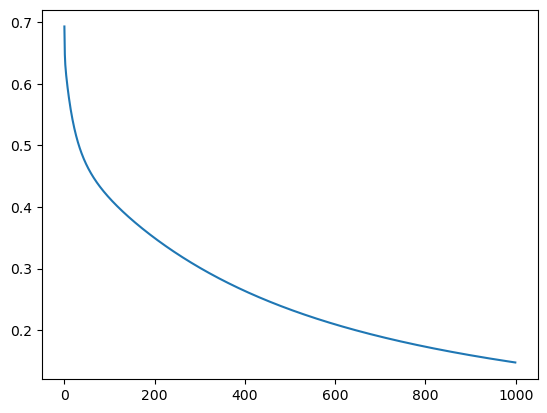

In [117]:
import pandas as pd
s1=pd.Series(costs)
s1.plot()

In [118]:
model=nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

model(x_train)



tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [123]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
nb_epoch = 10000
costs = []
accuracy_list = []

for epoch in range(nb_epoch+1):
    h = model(x_train)
    cost = F.binary_cross_entropy(h, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    costs.append(cost.item())

    if epoch % 100 == 0:
        pred = h>= torch.FloatTensor([0.5])
        correct_pred = pred.float() == y_train
        accuracy = correct_pred.sum().item()/len(correct_pred)
        accuracy_list.append(accuracy*100)

        print('Epoch: ', epoch, 'Cost: ', cost.item(), 'accuracy: ', accuracy)

Epoch:  0 Cost:  0.020090356469154358 accuracy:  1.0
Epoch:  100 Cost:  0.0199031513184309 accuracy:  1.0
Epoch:  200 Cost:  0.019719472154974937 accuracy:  1.0
Epoch:  300 Cost:  0.019539134576916695 accuracy:  1.0
Epoch:  400 Cost:  0.019362112507224083 accuracy:  1.0
Epoch:  500 Cost:  0.01918829046189785 accuracy:  1.0
Epoch:  600 Cost:  0.019017556682229042 accuracy:  1.0
Epoch:  700 Cost:  0.018849868327379227 accuracy:  1.0
Epoch:  800 Cost:  0.0186851117759943 accuracy:  1.0
Epoch:  900 Cost:  0.01852325163781643 accuracy:  1.0
Epoch:  1000 Cost:  0.018364161252975464 accuracy:  1.0
Epoch:  1100 Cost:  0.018207816407084465 accuracy:  1.0
Epoch:  1200 Cost:  0.018054107204079628 accuracy:  1.0
Epoch:  1300 Cost:  0.01790301501750946 accuracy:  1.0
Epoch:  1400 Cost:  0.017754431813955307 accuracy:  1.0
Epoch:  1500 Cost:  0.017608297988772392 accuracy:  1.0
Epoch:  1600 Cost:  0.01746455766260624 accuracy:  1.0
Epoch:  1700 Cost:  0.017323197796940804 accuracy:  1.0
Epoch:  1800

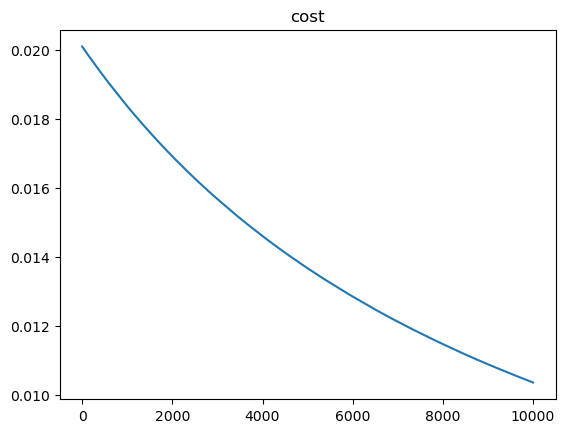

In [124]:
import matplotlib.pyplot as plt


s1=pd.Series(costs)
plt.plot(s1)
plt.title("cost")
plt.show()


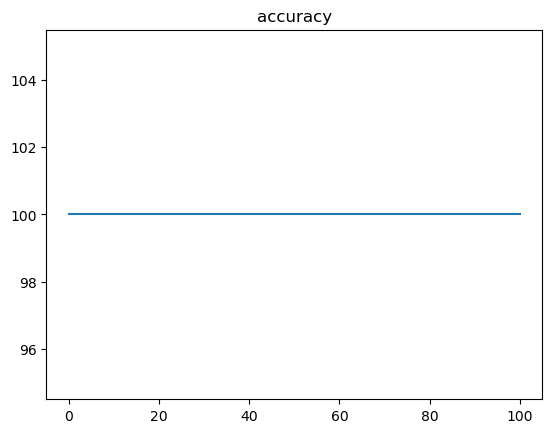

In [125]:


s2=pd.Series(accuracy_list)
plt.plot(s2)
plt.title("accuracy")
plt.show()

In [122]:
h2=model(x_train)
pred2= h2>=torch.FloatTensor([0.5])
pred2.float()

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])